In [1]:
include("../src/Conduction.jl");
using Plots, VegaLite, LaTeXStrings, QuadGK;

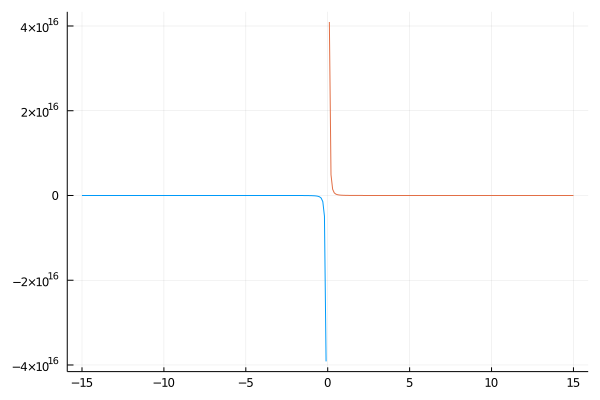

In [2]:
eta = 1;
T = 300;

semiconductor = Conduction.Semiconductor(
    1.38 * 10^-23, # Boltzman constant (J.K^-1)
    1.6*10^-19, # Electron's charge (C)
    10^7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    0.1 * 1.6*10^-19, # Mode effect of the phonons (J)
    2.1 * 10^18, # intrinsic semiconductor's density (cm^-3)
    2.1 * 10^18, # Doping states' density (cm^-3)
    0.1 * 1.6 * 10^-19, # Energy to a vacant target site (J)
    -2*10^5, # Field (V.cm^-1)
    10^13, # Base electron jump rate
    -10.0, # Fermi level (J)
    2.7, # Intrinsic semiconductor's gaussian width (J)
    2.7, # Doping states' gaussian width (J)
    2.7 # Amount of disorder
);


fn(omega) = 1 / (eta * omega^2 * (exp(Conduction.hbar * omega / (semiconductor.k * T)) - 1));

range_neg = -15:0.1:-0.1;
range_pos = 0.1:0.1:15;

plot(range_neg, fn.(range_neg), label="")
plot!(range_pos, fn.(range_pos), label="")


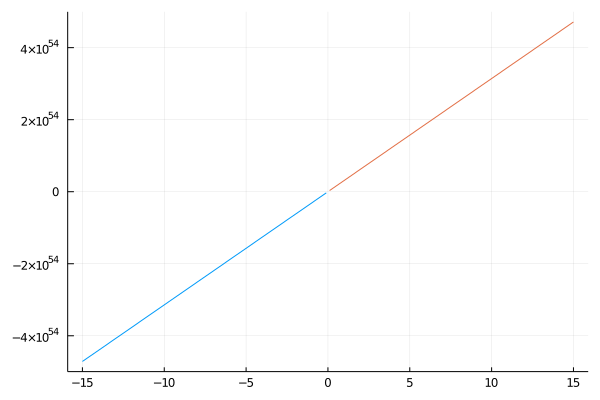

In [3]:
fd(omega) = omega^2 / (eta * semiconductor.gamma(T)^2 * (exp(Conduction.hbar * omega / (semiconductor.k * T)) - 1));

plot(range_neg, fd.(range_neg), label="")
plot!(range_pos, fd.(range_pos), label="")

In [31]:
test(omega) = omega^2 * (exp(Conduction.hbar * omega / (semiconductor.k * T)) - 1)
test2(omega) = (exp(Conduction.hbar * omega / (semiconductor.k * T)) - 1)

test2 (generic function with 1 method)

In [32]:
println(test(10))
println(test2(10))

2.546851618490109e-11
2.546851618490109e-13


In [34]:
println(test(-10))
println(test2(-10))

-2.546851618490109e-11
-2.546851618490109e-13
